# Proyek Akhir PKS Digital School

Untuk tugas akhir ini, saya akan mencari kata kunci "varian omicron" dan pengambilan tweet dari tanggal "2021-12-03" sampai "2021-12-06". Kemudian untuk data tambahan saya akan mengambil data di www.viva.co.id terkait varian omicron.

**Alasannya**, varian omicron adalah varian baru dari Covid 19 yang akhir-akhir ini membuat resah banyak negara termasuk Indonesia dengan tingkat penyebarannya yang cukup cepat dan masuk dalam daftar variant of concern WHO sejak 26 November 2021. 

**Tujuan** penelitian kali ini adalah melihat respon sentimen pengguna twitter Indonesia terkait varian baru omicron apakah cenderung positif atau negatif.

In [ ]:
import tweepy
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re, string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF

import nltk

from nltk.probability import FreqDist
from wordcloud import WordCloud, wordcloud

In [ ]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

tokens.keys()

dict_keys(['bearer_token', 'api_key', 'api_key_secret', 'access_token', 'access_token_secret'])

In [ ]:
#Membuat variabel authentikasi dan api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Mengumpulkan dataset dari dua sumber:

1. Twitter dari 4 hari kebelakang hingga hari ini. (3 Desember – 6 Desember 2021)

2. Menggunakan sumber data tambahan dengan cara melakukan webscraping dari situs www.beritasatu.com


In [ ]:
# 1. Mengambil data dari twitter

search_words = "varian omicron"
date_until = "2021-12-06"
date_since = "2021-12-03"
new_search = search_words + " -filter:retweets"    # filter disini digunakan untuk melakukan pengecualian pada konten Retweet

tweets = tweepy.Cursor(api.search_tweets,
        q=new_search,
        lang="id",
        until=date_until, since_id = date_since).items(300)   # Sampel yang diambil sebanyak 300 tweet

In [ ]:
items = []
for tweet in tweets:
    items.append(tweet.text)
hasil = pd.DataFrame(data=items, columns=['tweet'])
print(hasil)

                                                 tweet
0    Kebijakan paling mutakhir yang dikeluarkan ada...
1    Waspada dan jangan lengah terhadap Covid-19 va...
2    Senegal melaporkan kasus pertama virus Corona ...
3    Isaev juga mencatat, karena banyaknya mutasi y...
4    COVID-19: Varian Omicron merebak ke 16 negeri ...
..                                                 ...
295  Mengantisipasi penyebaran varian Omicron di In...
296  Kerajaan Kawal Ketat Penularan Varian Omicron ...
297  Varian Omicron, Krisis Kepemimpinan Sekuler, d...
298  Potensi penularan varian Omicron hendaknya men...
299  staycation paan yeuh del. varian corona noh om...

[300 rows x 1 columns]


In [ ]:
hasil.to_csv('omicron_tweets_20211206.csv')  # Membuat dataset csv dan menyimpan nama baru hasil proses scraping tweet

In [ ]:
df = pd.read_csv('omicron_tweets_20211206.csv', index_col = 0)
df

,tweet
0,Kebijakan paling mutakhir yang dikeluarkan ada...
1,Waspada dan jangan lengah terhadap Covid-19 va...
2,Senegal melaporkan kasus pertama virus Corona ...
3,"Isaev juga mencatat, karena banyaknya mutasi y..."
4,COVID-19: Varian Omicron merebak ke 16 negeri ...
...,...
295,Mengantisipasi penyebaran varian Omicron di In...
296,Kerajaan Kawal Ketat Penularan Varian Omicron ...
297,"Varian Omicron, Krisis Kepemimpinan Sekuler, d..."
298,Potensi penularan varian Omicron hendaknya men...


In [ ]:
# 2. Mengambil data dari website terkait varian omicron

from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests 
import pandas as pd

alamat = "https://www.viva.co.id/tag/omicron"

response = requests.get(alamat)
soup = bs(response.text, 'html.parser')

# ------------------------

table = soup.find("div", {"class":"article-list-container"})
paragraphs = table.find_all(["h2"])
    
#-----------------
index = 0
    
news = [paragraph.get_text().strip() for paragraph in paragraphs]

df_news = pd.DataFrame(news, columns = ["title"])
print(df_news)

                                                title
0   Cek 5 Fakta Terkini Omicron, Sudah Masuk Indon...
1   Data Awal di Afsel: Varian Omicron Tidak Sebab...
2   Hoaks Omicron Terus Beredar, Masyarakat Harus ...
3   Kurang dari Sepertiga Pasien Omicron Alami Sak...
4   Libur Nataru, Wagub DKI Minta Masyarakat Waspa...
5   WHO: Negara-negara Kaya Mungkin Timbun Vaksin ...
6   Virus Corona Menyebar di Pub dan Kelab di Kota...
7   Bos Pfizer Klaim Vaksinnya Ampuh Lawan Varian ...
8   Uji Lab: Booster Vaksin Pfizer/BioNTech Mampu ...
9    WHO: Vaksin COVID Seharusnya Ampuh Lawan Omicron
10  Dokter Peringatkan Gejala Tak Biasa Varian Omi...
11  Varian Omicron Turunkan Efikasi Vaksin, Ini Ka...


In [ ]:
df_news.to_csv('omicron_berita_20211208.csv')  # Membuat dataset csv dan menyimpan nama baru hasil proses scraping website

In [ ]:
df_news = pd.read_csv('omicron_berita_20211208.csv', index_col = 0)
df_news

,title
0,"Cek 5 Fakta Terkini Omicron, Sudah Masuk Indon..."
1,Data Awal di Afsel: Varian Omicron Tidak Sebab...
2,"Hoaks Omicron Terus Beredar, Masyarakat Harus ..."
3,Kurang dari Sepertiga Pasien Omicron Alami Sak...
4,"Libur Nataru, Wagub DKI Minta Masyarakat Waspa..."
5,WHO: Negara-negara Kaya Mungkin Timbun Vaksin ...
6,Virus Corona Menyebar di Pub dan Kelab di Kota...
7,Bos Pfizer Klaim Vaksinnya Ampuh Lawan Varian ...
8,Uji Lab: Booster Vaksin Pfizer/BioNTech Mampu ...
9,WHO: Vaksin COVID Seharusnya Ampuh Lawan Omicron


## 1. Data Preparation - Text Preprocessing

In [ ]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data

def stopword_cleaner(data):
    sw_indonesia = stopwords.words("english")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

def slang_cleaner(data):
    slang_list = [
        #(slang_word,fixed_word)
        ('yg', 'yang'),
        ('klo', 'kalau'),
        ('lg', 'lagi'),
        ('gue', 'saya'),
        ('utk', 'untuk'),
        ('tp', 'tapi'),
        ('udh', 'sudah'),
        ('aja', 'saja'),
        ('udah', 'sudah'),
        ('dgn', 'dengan')
    ]
    
    word_token = word_tokenize(data)
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data 

def proses(data):
    data = case_folding(data)
    data = slang_cleaner(data)
    data = word_tokenize(data)
    data = stopword_cleaner(data)
    return data

def sentence_token(data):
    data = sent_tokenize(data)
    return(data)


In [ ]:
df = pd.read_csv('omicron_tweets_20211206.csv', index_col = 0)

In [ ]:
#Melakukan Text Preprocessing data tweet. Memasukkan pada dataframe dengan nama kolom tweet_clean.


datasets = [df]    # <--- Data Twitter
 
for teks in datasets:
    
    teks['clean_tweet'] = teks['tweet'].apply(proses)

   
teks.head()

,tweet,clean_tweet
0,Kebijakan paling mutakhir yang dikeluarkan ada...,kebijakan paling mutakhir yang dikeluarkan ada...
1,Waspada dan jangan lengah terhadap Covid-19 va...,waspada dan jangan lengah terhadap covid varia...
2,Senegal melaporkan kasus pertama virus Corona ...,senegal melaporkan kasus pertama virus corona ...
3,"Isaev juga mencatat, karena banyaknya mutasi y...",isaev juga mencatat karena banyaknya mutasi ya...
4,COVID-19: Varian Omicron merebak ke 16 negeri ...,covid varian omicron merebak ke negeri di amer...


## 2. Text Analysis

Setelah kita melakukan pembersihan data **omicron_tweets_20211206.csv** kita akan menyimpan data bersihnya terlebih dahulu ke file csv baru dengan nama **omicron_tweets_20211206_clean.csv** kemudian kita membuka data tersebut dengan nama variabel df_tweet.

In [ ]:
teks.to_csv('omicron_tweets_20211206_clean.csv')  # Membuat dataset csv dan menyimpan nama baru hasil proses cleaning

In [ ]:
# Membuka data clean tweet
df_tweet = pd.read_csv('omicron_tweets_20211206_clean.csv', index_col = 0)
df_tweet.rename(columns = {'clean_tweet':'data_omicron'}, inplace = True)   # Mengganti nama kolom
print(df_tweet.head())

                                               tweet  \
0  Kebijakan paling mutakhir yang dikeluarkan ada...   
1  Waspada dan jangan lengah terhadap Covid-19 va...   
2  Senegal melaporkan kasus pertama virus Corona ...   
3  Isaev juga mencatat, karena banyaknya mutasi y...   
4  COVID-19: Varian Omicron merebak ke 16 negeri ...   

                                        data_omicron  
0  kebijakan paling mutakhir yang dikeluarkan ada...  
1  waspada dan jangan lengah terhadap covid varia...  
2  senegal melaporkan kasus pertama virus corona ...  
3  isaev juga mencatat karena banyaknya mutasi ya...  
4  covid varian omicron merebak ke negeri di amer...  


In [ ]:
# Menghapus kolom tweet
df1 = df_tweet.drop(df.columns[[0]], axis=1)
print(df1.head())

                                        data_omicron
0  kebijakan paling mutakhir yang dikeluarkan ada...
1  waspada dan jangan lengah terhadap covid varia...
2  senegal melaporkan kasus pertama virus corona ...
3  isaev juga mencatat karena banyaknya mutasi ya...
4  covid varian omicron merebak ke negeri di amer...


Langkah selanjutnya membuka data df_news hasil scraping dari website terkait *omicron*.

In [ ]:
df2 = pd.read_csv('omicron_berita_20211208.csv', index_col = 0)
df2.rename(columns = {'title':'data_omicron'}, inplace = True)
print(df2.head())

                                        data_omicron
0  Cek 5 Fakta Terkini Omicron, Sudah Masuk Indon...
1  Data Awal di Afsel: Varian Omicron Tidak Sebab...
2  Hoaks Omicron Terus Beredar, Masyarakat Harus ...
3  Kurang dari Sepertiga Pasien Omicron Alami Sak...
4  Libur Nataru, Wagub DKI Minta Masyarakat Waspa...


Langkah berikutnya kita satukan data clean dari tweet dan data dari berita website dengan nama variabel **data_omicron**.

In [ ]:
# Menggabungkan hasil data dari tweet dan berita terkait 'omicron'
# list data yang akan di gabung
list_dataframe = [df1, df2]

data_omicron = pd.concat(list_dataframe)
data_omicron.head()

,data_omicron
0,kebijakan paling mutakhir yang dikeluarkan ada...
1,waspada dan jangan lengah terhadap covid varia...
2,senegal melaporkan kasus pertama virus corona ...
3,isaev juga mencatat karena banyaknya mutasi ya...
4,covid varian omicron merebak ke negeri di amer...


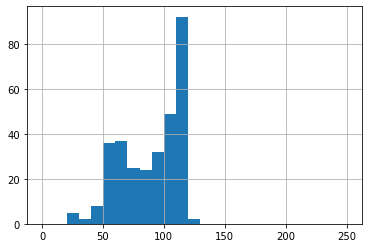

In [ ]:
#Melakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#Menampilkan plot dari setiap analysis


## a). Distribusi Frekuensi karakter per tweet

bin_range = np.arange(0, 260, 10)
data_omicron['data_omicron'].str.len().hist(bins=bin_range)
plt.show()

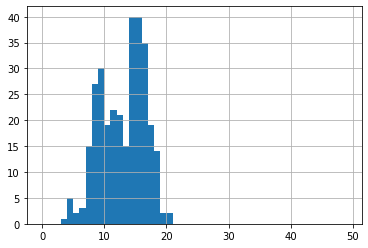

In [ ]:
## b) Distribusi panjang kata per tweet

#Sekarang kita akan mencoba melihat distribusi jumlah kata per data yang kita miliki. 
#Disini kita bisa melihat bagaimana persebaran panjang tweet secara keseluruhan.

bin_range = np.arange(0, 50)
data_omicron['data_omicron'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

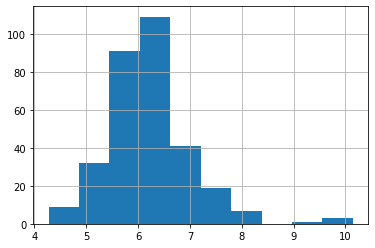

In [ ]:
## c) Distribusi panjang rata-rata kata per tweet

#Sekarang kita akan mencoba melihat distribusi dari panjang rata-rata kata yang ada pada tiap tweet.


data_omicron['data_omicron'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

<FreqDist with 1216 samples and 3903 outcomes>
[('varian', 279), ('omicron', 253), ('covid', 106), ('baru', 69), ('di', 64), ('dan', 50), ('yang', 45), ('virus', 44), ('ini', 42), ('negara', 40), ('ada', 39), ('dari', 34), ('waspada', 33), ('untuk', 33), ('sudah', 32), ('prokes', 29), ('waspadai', 29), ('corona', 28), ('pemerintah', 28), ('kasus', 26)]


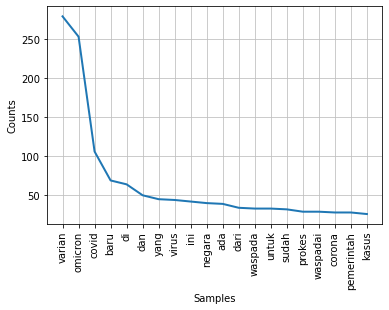

In [ ]:
# d) Distribusi Frekuensi Kata

data_omicron['data_omicron'] = data_omicron['data_omicron'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for data_omicron in data_omicron['data_omicron'] for word in data_omicron]
fqdist = FreqDist(tweets)
print(fqdist)

most_common_word = fqdist.most_common(20)

print(most_common_word)

fqdist.plot(20,cumulative=False)

plt.show()

In [ ]:
# e) Distribusi bi-gram

result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(result)

(varian, omicron)         180
(varian, baru)             49
(covid, varian)            45
(virus, corona)            26
(penyebaran, varian)       18
(baru, omicron)            18
(corona, omicron)          16
(baru, covid)              15
(baru, virus)              15
(afrika, selatan)          14
(varian, covid)            11
(waspadai, penyebaran)     11
(waspada, varian)          10
(omicron, di)              10
(covid, omicron)           10
(kematian, akibat)         10
(omicron, asal)            10
(di, negara)               10
(asal, afrika)             10
(belum, ada)                9
dtype: int64


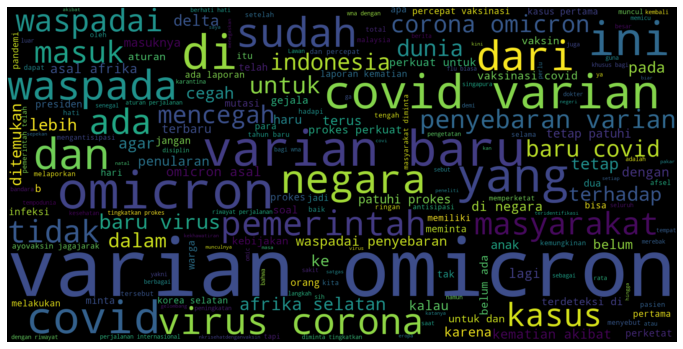

In [ ]:
# Membuat WordCloud

data_omicron = data_omicron['data_omicron']

text2 = " ".join(title for title in data_omicron)

wcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text2)
plt.figure(figsize=(12,10))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Membuat dataset csv dan menyimpan nama baru hasil proses penggabungan data tweet dan data berita website 
data_omicron.to_csv('data_omicron_20211210.csv')  


## 3. Sentiment Analysis

Untuk sentiment analysis kita mengambil kembali data dari twitter, karna tujuan saya adalah melihat respon sentimen pengguna twitter Indonesia terkait varian baru omicron apakah cenderung positif atau negatif.

In [ ]:
# 1. Mengambil data dari twitter

search_words = "varian omicron"
date_until = "2021-12-06"
date_since = "2021-12-03"
new_search = search_words + " -filter:retweets"    # filter disini digunakan untuk melakukan pengecualian pada konten Retweet

tweets = tweepy.Cursor(api.search_tweets,
        q=new_search,
        lang="id",
        until=date_until, since_id = date_since).items(300)   # Sampel yang diambil sebanyak 300 tweet

In [ ]:
items = []
for tweet in tweets:
        items.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
hasil = pd.DataFrame(data=items, columns=['clean_tweet'])
print(hasil)

                                           clean_tweet
0    Kebijakan paling mutakhir yang dikeluarkan ada...
1    Waspada dan jangan lengah terhadap Covid 19 va...
2    Senegal melaporkan kasus pertama virus Corona ...
3    Isaev juga mencatat karena banyaknya mutasi ya...
4    COVID 19 Varian Omicron merebak ke 16 negeri d...
..                                                 ...
295  Mengantisipasi penyebaran varian Omicron di In...
296      Kerajaan Kawal Ketat Penularan Varian Omicron
297  Varian Omicron Krisis Kepemimpinan Sekuler dan...
298  Potensi penularan varian Omicron hendaknya men...
299  staycation paan yeuh del varian corona noh omi...

[300 rows x 1 columns]


In [ ]:
# Membuat nama variabel df_raw
df_raw = hasil
df_raw.head()

,clean_tweet
0,Kebijakan paling mutakhir yang dikeluarkan ada...
1,Waspada dan jangan lengah terhadap Covid 19 va...
2,Senegal melaporkan kasus pertama virus Corona ...
3,Isaev juga mencatat karena banyaknya mutasi ya...
4,COVID 19 Varian Omicron merebak ke 16 negeri d...


In [ ]:
#kita baca dataset kita

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

In [ ]:
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']
for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
 

Kebijakan paling mutakhir yang dikeluarkan adalah memperketat ketentuan kedatangan pelaku perjalanan dari luar nege
mutakhir
 ['positif']
positif: 1
negatif: 0
Waspada dan jangan lengah terhadap Covid 19 varian Omicron tetap disiplin Prokes covi d19 prokes
waspada
 ['negatif']
lengah
 ['negatif']
positif: 0
negatif: 2
Senegal melaporkan kasus pertama virus Corona varian Omicron Kasus itu dideteksi dari seorang pengunjung yang meng
melaporkan
 ['positif']
kasus
 ['negatif']
virus
 ['negatif']
kasus
 ['negatif']
positif: 1
negatif: 3
Isaev juga mencatat karena banyaknya mutasi yang terjadi pada varian Omicron sulit untuk memprediksi bagaimana pe
sulit
 ['negatif']
sulit
 ['negatif']
positif: 0
negatif: 2
COVID 19 Varian Omicron merebak ke 16 negeri di Amerika Syarikat
positif: 0
negatif: 0
Waspada dan jangan lengah terhadap Covid 19 varian Omicron tetap disiplin Prokes covi d19 prokes
waspada
 ['negatif']
lengah
 ['negatif']
positif: 0
negatif: 2
Kasus Covid 19 Dari Varian Omicron Masih 

Sekarang mari kita hitung evaluasi dari sentimen kita dengan persamaan berikut

Total Nilai = Nilai Positif - Nilai Negatif

Total Nilai > 0, maka sentimen positif

Total Nilai < 0, maka sentimen negatif

Total Nilai = 0, maka sentimen netral

Hasil perhitungan kita masukkan ke dalam dataframe pandas agar lebih mudah untuk memanipulasi dan melihat. Lalu kita coba cari nilai rata-rata dan standar deviasinya.

In [ ]:
hasil = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    print ("-----------------------------------------------------")

Kebijakan paling mutakhir yang dikeluarkan adalah memperketat ketentuan kedatangan pelaku perjalanan dari luar nege
mutakhir
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
Waspada dan jangan lengah terhadap Covid 19 varian Omicron tetap disiplin Prokes covi d19 prokes
waspada
 ['negatif']
lengah
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
Senegal melaporkan kasus pertama virus Corona varian Omicron Kasus itu dideteksi dari seorang pengunjung yang meng
melaporkan
 ['positif']
kasus
 ['negatif']
virus
 ['negatif']
kasus
 ['negatif']
positif: 1
negatif: 3
-----------------------------------------------------
Isaev juga mencatat karena banyaknya mutasi yang terjadi pada varian Omicron sulit untuk memprediksi bagaimana pe
sulit
 ['negatif']
sulit
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
COVID 19 Varian Omicron merebak ke 16 negeri di Amerika Syarikat
positif

Melakukan Sentiment Analysis 

In [ ]:
sentiments = ["positif" if sentimen >= 0 else "negatif" for sentimen in hasil]
df_raw["sentiment"] = sentiments

Memasukkan hasilnya pada dataframe dengan nama kolom **sentiment**.

In [ ]:
df_raw

,clean_tweet,sentiment
0,Kebijakan paling mutakhir yang dikeluarkan ada...,positif
1,Waspada dan jangan lengah terhadap Covid 19 va...,negatif
2,Senegal melaporkan kasus pertama virus Corona ...,negatif
3,Isaev juga mencatat karena banyaknya mutasi ya...,negatif
4,COVID 19 Varian Omicron merebak ke 16 negeri d...,positif
...,...,...
295,Mengantisipasi penyebaran varian Omicron di In...,positif
296,Kerajaan Kawal Ketat Penularan Varian Omicron,negatif
297,Varian Omicron Krisis Kepemimpinan Sekuler dan...,negatif
298,Potensi penularan varian Omicron hendaknya men...,positif


Nilai rata-rata: -0.38666666666666666
Standar deviasi: 1.0818913480053758


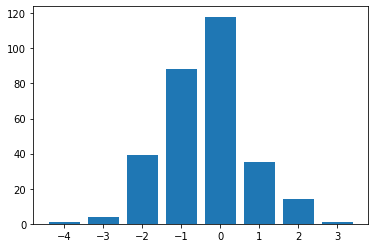

In [ ]:
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()


Hasil yang kita dapat adalah,

Nilai rata-rata: -0.387

Standar deviasi: 1.082

**~ Analisis terkait Sentiment Analysis varian omicron:**

Plot Nilai Sentimen terhadap jumlah
Artinya bahwa untuk jumlah tweet 300 buah Sentimen masyarakat twitter masih berada ke arah sedikit negatif untuk bahasan varian omicron covid 19. Dari sini kita tahu bahwa dengan database kata yang baik dan jumlah data mentah yang mumpuni akan membuat analisis sentimen menjadi alat yang cukup kuat untuk melihat kecenderungan pasar. Analisis lebih lanjut dari data juga akan menguatkan kesimpulan yang didapat dari proses analisis sentimen.

**Text Analysis:**

Dengan melihat berbagai text analysis diatas, kita mendapat gambaran yang lebih jelas, bahwa keseluruhan tweet membahas tentang varian omicron. Dari hasil ini sebenarnya terlihat bahwa omicron bisa menjadi salah satu stopword yang kita pilih, karena akan memberikan kesempatan kata lain untuk masuk. Dimana untuk omicron sendiri kita sudah tahu bahwa itu kata kunci penting karena pencarian kita berdasar pada kata tersebut.


**Sentiment Analysis:**

Nilai rata-rata untuk sentiment analysis adalah -0.387 dan standar deviasi 1.082. Dari data angka tersebut dan melihat grafik batang, kita dapat mengambil kesimpulan Sentimen masyarakat twitter masih berada ke arah sedikit negatif untuk bahasan varian omicron covid 19 untuk jumlah tweet 300.


## 4. Analisa Data Twitter Menggunakan NetworkX

Terdapat dua hal yang bisa kita terapkan konsep graph pada data twitter. Pertama adalah saat kita ingin melihat koneksi dari tiap user, bagaimana user berinteraksi dengan user lainnya. Kedua adalah saat kita ingin melihat relasi kata terhadap kata lainnya. Kali ini kita akan melakukan implementasi analisis graph pada data tweet. Data tweet yang kita gunakan adalah data tweet yang kita gunakan sebelumnya, yaitu data **varian omicron**.

In [ ]:
#pip install networkx

import networkx as nx

In [ ]:
# Membuka data clean tweet
df_tweets = pd.read_csv('omicron_tweets_20211206_clean.csv', index_col = 0)
df_tweets

,tweet,clean_tweet
0,Kebijakan paling mutakhir yang dikeluarkan ada...,kebijakan paling mutakhir yang dikeluarkan ada...
1,Waspada dan jangan lengah terhadap Covid-19 va...,waspada dan jangan lengah terhadap covid varia...
2,Senegal melaporkan kasus pertama virus Corona ...,senegal melaporkan kasus pertama virus corona ...
3,"Isaev juga mencatat, karena banyaknya mutasi y...",isaev juga mencatat karena banyaknya mutasi ya...
4,COVID-19: Varian Omicron merebak ke 16 negeri ...,covid varian omicron merebak ke negeri di amer...
...,...,...
295,Mengantisipasi penyebaran varian Omicron di In...,mengantisipasi penyebaran varian omicron di in...
296,Kerajaan Kawal Ketat Penularan Varian Omicron ...,kerajaan kawal ketat penularan varian omicron
297,"Varian Omicron, Krisis Kepemimpinan Sekuler, d...",varian omicron krisis kepemimpinan sekuler dan...
298,Potensi penularan varian Omicron hendaknya men...,potensi penularan varian omicron hendaknya men...


Langkah selanjutnya adalah menyiapkan data kita. Untuk dapat dimasukkan ke dalam objek networkx, data kita haruslah berbentuk tuple dengan dua komponen, yaitu edge, dan weight.
Nilai weight adalah yang akan menjadi pembobotan edge kita. Jika edge yang akan kita masukkan banyak maka kita bisa menggunakan list.
Kita akan mengubah data kita menjadi n-gram, dan menjadikannya edge kita. Weight diambil dari seberapa sering node tersebut keluar

In [ ]:
tweet_gram = [word for clean_tweet in df_tweets["clean_tweet"] for word in clean_tweet.split()]
tweets_bigram = nltk.ngrams(tweet_gram, 2)
fdist = nltk.FreqDist(tweets_bigram)
fdist

FreqDist({('varian', 'omicron'): 180, ('varian', 'baru'): 49, ('covid', 'varian'): 45, ('virus', 'corona'): 26, ('baru', 'omicron'): 18, ('penyebaran', 'varian'): 18, ('corona', 'omicron'): 16, ('baru', 'covid'): 15, ('baru', 'virus'): 15, ('afrika', 'selatan'): 14, ...})

In [ ]:
list_data = [[bigram_word, weight]for bigram_word, weight in fdist.items()]

In [ ]:
df_bigram = pd.DataFrame(list_data, columns=['bigram', 'count'])
df_bigram_sort = df_bigram.sort_values(by=["count"], ascending=False).copy().reset_index(drop=True)[:1642]
df_bigram_sort

,bigram,count
0,"(varian, omicron)",180
1,"(varian, baru)",49
2,"(covid, varian)",45
3,"(virus, corona)",26
4,"(penyebaran, varian)",18
...,...,...
1637,"(masa, perpanjangan)",1
1638,"(selain, masa)",1
1639,"(sih, selain)",1
1640,"(akal, sih)",1


bigram_sort adalah dataframe yang anggotanya telah kita sort. Alasannya? karena kita akan melakukan filtering dan mengambil kombinasi dengan nilai count tertentu. Pada kesempatan kali ini kita akan mengambil sampai index 1642 / count > 1.
Setelah itu kita transpose dataset tersebut.

In [ ]:
d = df_bigram_sort.set_index("bigram").T.to_dict("records")
d

[{('varian', 'omicron'): 180,
  ('varian', 'baru'): 49,
  ('covid', 'varian'): 45,
  ('virus', 'corona'): 26,
  ('penyebaran', 'varian'): 18,
  ('baru', 'omicron'): 18,
  ('corona', 'omicron'): 16,
  ('baru', 'virus'): 15,
  ('baru', 'covid'): 15,
  ('afrika', 'selatan'): 14,
  ('waspadai', 'penyebaran'): 11,
  ('varian', 'covid'): 11,
  ('di', 'negara'): 10,
  ('waspada', 'varian'): 10,
  ('omicron', 'di'): 10,
  ('asal', 'afrika'): 10,
  ('omicron', 'asal'): 10,
  ('covid', 'omicron'): 10,
  ('kematian', 'akibat'): 10,
  ('waspadai', 'covid'): 9,
  ('perkuat', 'untuk'): 9,
  ('patuhi', 'prokes'): 9,
  ('omicron', 'tetap'): 9,
  ('belum', 'ada'): 9,
  ('prokes', 'perkuat'): 9,
  ('tetap', 'patuhi'): 9,
  ('vaksinasi', 'covid'): 9,
  ('omicron', 'dan'): 8,
  ('corona', 'varian'): 8,
  ('untuk', 'dan'): 8,
  ('akibat', 'varian'): 8,
  ('omicron', 'sudah'): 8,
  ('varian', 'delta'): 8,
  ('terdeteksi', 'di'): 8,
  ('ada', 'varian'): 8,
  ('varian', 'virus'): 7,
  ('cegah', 'varian'): 7,


Langkah selanjutnya, menginisiasi objek networkx, dan memasukkan relasi antar node kita beserta weight nya.

In [ ]:
G = nx.Graph()

nodes_size = []

for node, weight in d[0].items():
    G.add_edge(node[0], node[1], weight=weight*10)

Graph kita telah siap beserta node dan edge nya.
 
Sebagai bahan filtering kita akan mencari nilai degree dari semua node kita. Degree adalah berapa banyak relasi yang terhubung kepada node yang jadi acuan.

In [ ]:
deg = dict(G.degree)

Sekarang mari kita ploting graph kita, kita siapkan figure plot dan pemetaan koordinat dari data kita. 
Selanjutnya kita lakukan ploting

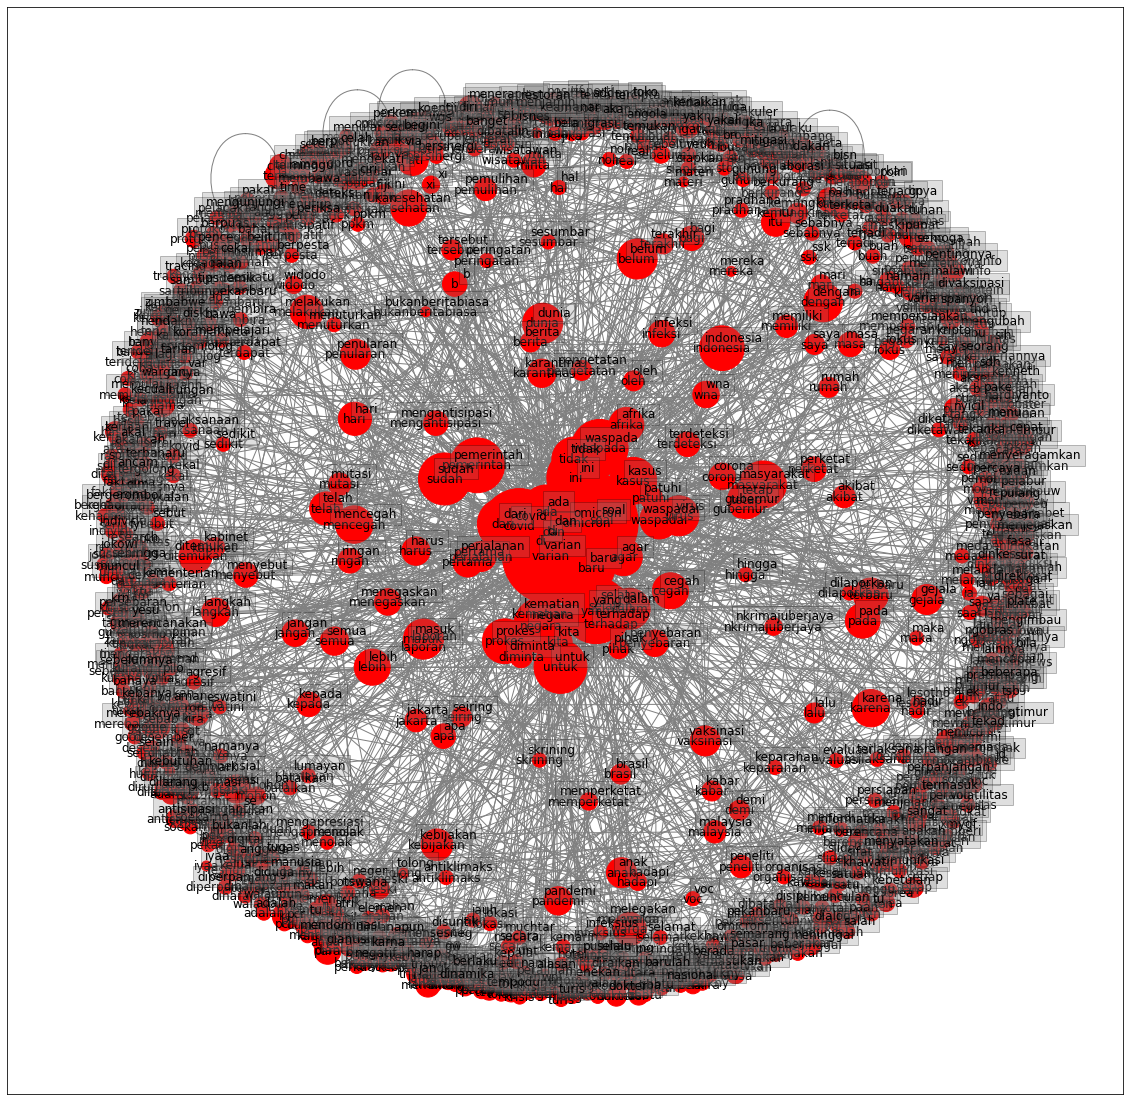

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
        font_size=12,
        width=1,
        edge_color='grey',
        node_color='red',
        with_labels = True,
        node_size = [weight * 100 for weight in deg.values()],
        ax=ax)
    
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.025, value[1]+.015
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=12)    
    
plt.show()

Walau dibatasi hanya pada 1642 edge, ternyata hasilnya masih terlalu ramai. Sekarang mari kita coba melakukan filtering berdasarkan pada degree.
Kita siapkan terlebih dahulu node dan degree yang akan jadi parameter penentu ukuran node. Kita tentukan akan mencari nilai degree > 10.

In [ ]:
deg_filter= G.degree()
 
items_filter = [n for n in deg_filter if n[1] > 10]

node = [node[0] for node in items_filter]
degree = [node[1]*20 for node in items_filter]

Sama seperti sebelumnya, kita membuat plot. Perbedaannya kali ini kita akan menggunakan subgraph, karena data utama tetap kita ambil dari graph G.

Graph with 44 nodes and 170 edges


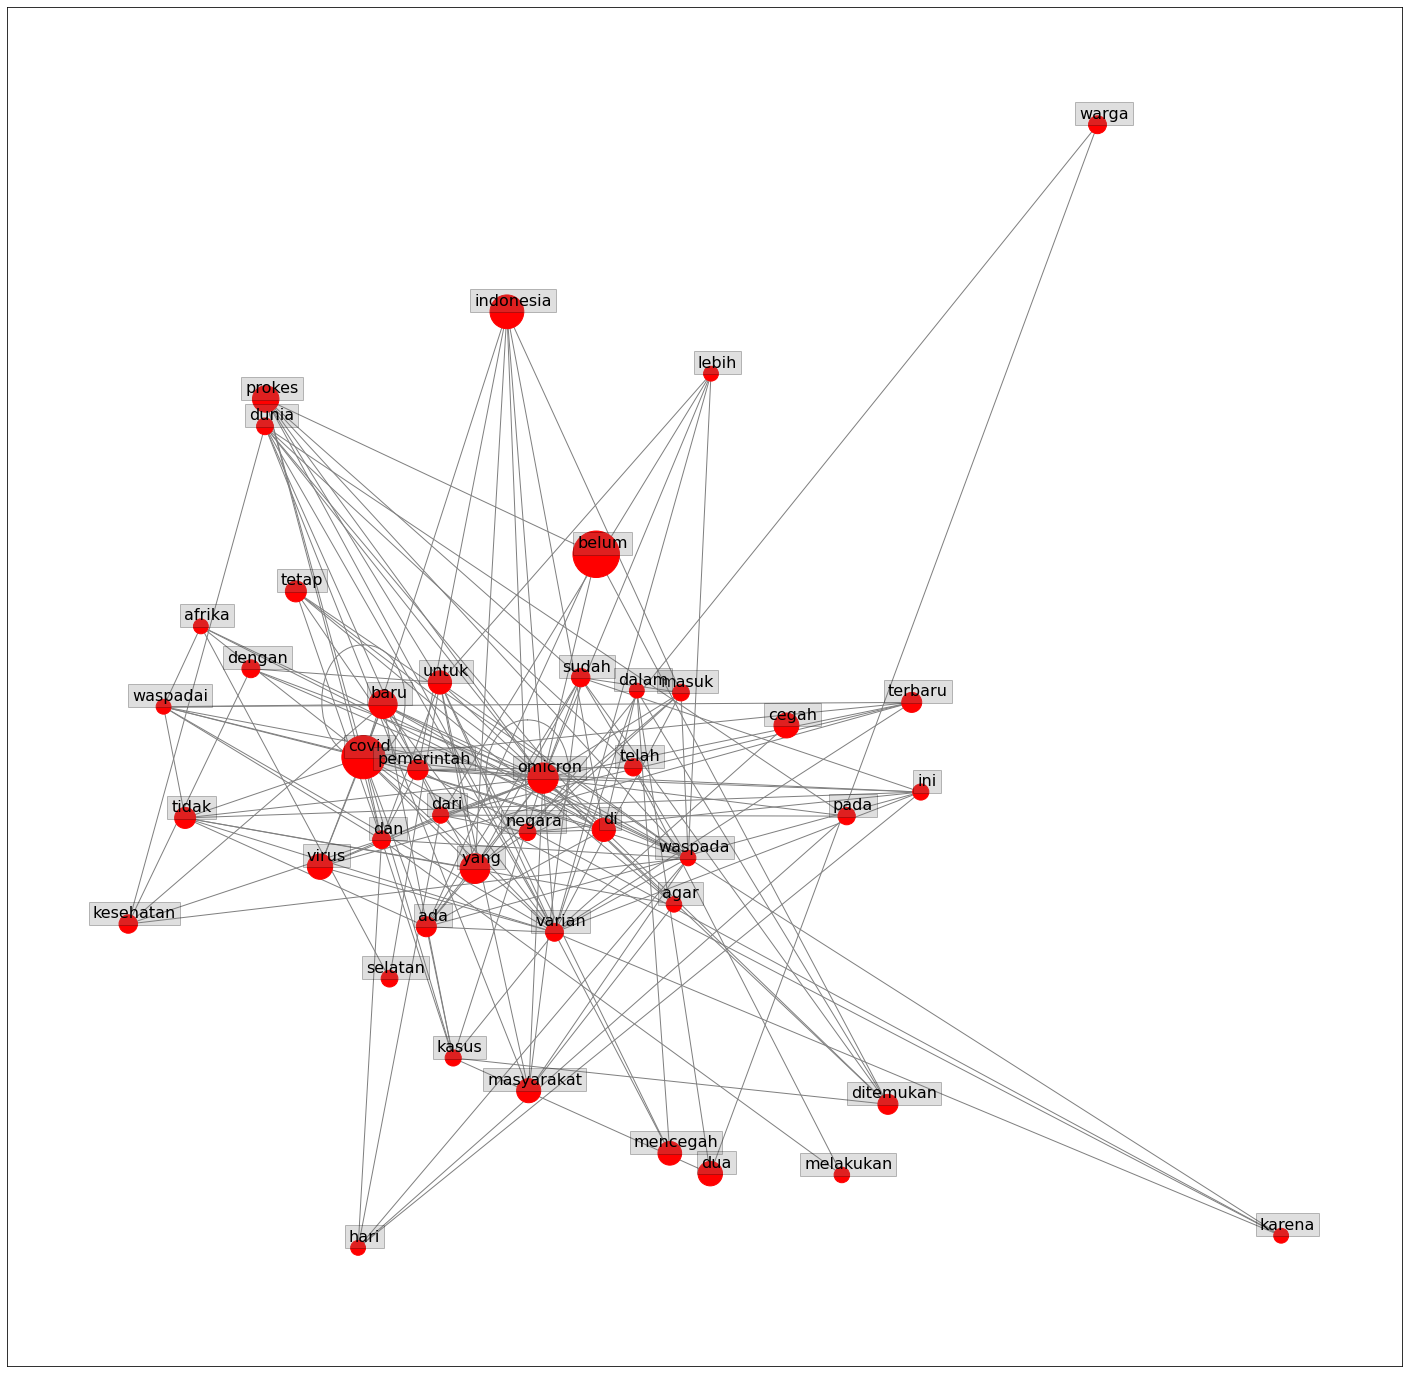

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))

pos = nx.spring_layout(G, k=1.5)
k = G.subgraph(node)
print(k)

nx.draw_networkx(
    k, 
    pos=pos,
    font_size=16,
    font_color='white',
    width=1,
    edge_color='grey',
    node_color='red',
    node_size = degree,
    with_labels= False,
    ax=ax
    )

# # Create offset labels
for key, value in pos.items():
  if key in node:
    x, y = value[0]+.005, value[1]+.005
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=16)

plt.show()

Bisa dilihat hubungan antara kata 'covid - virus - terbaru', 'afrika - covid - omicron', kemudian kata 'belum - ditemukan - di - Indonesia'. Dari relasi ini bisa dilihat covid virus terbaru varian omicron berasal dari afrika, belum ditemukan di Indonesia. Kemudian 'masyarakat waspada omicron', kata 'prokes covid' juga terhubung. **Kesimpulan** pengguna twitter cenderung positif dalam berinteraksi terkait varian omicron ini.